# Gaussian Quantum States in the Fock Basis
Author: Nicolás Quesada

In the [background section](hafnian.html) of The Walrus library documentation, some basic ideas related to (loop) hafnians were introduced. This tutorial is a computational exploration of the same ideas.

In [1]:
import strawberryfields as sf
from strawberryfields import ops
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
%config InlineBackend.figure_formats=['svg']

from thewalrus.quantum import density_matrix

## Pure State (no loss)

In [arXiv:1809.04680](https://arxiv.org/pdf/1809.04680.pdf),  Sabapathy et al. propose the following circuit to generate cubic phase states

<img src="./_static/circ0.svg" height="300" width="600"><br>

with the following parameters:

In [2]:
# gate parameters for the heralded quantum circuit.
# squeezing magnitudes
sq_r = [0.71, 0.67, -0.42]
# squeezing phase
sq_phi = [-2.07, 0.06, -3.79]
# displacement magnitudes
d_r = [-0.02, 0.34, 0.02]
# beamsplitter theta
bs_theta1, bs_theta2, bs_theta3 = [-1.57, 0.68, 2.5]
# beamsplitter phi
bs_phi1, bs_phi2, bs_phi3 = [0.53, -4.51, 0.72]

We can use [Strawberry Fields](https://strawberryfields.readthedocs.io) to simulate the Gaussian evolution of the modes up to right before the measurement:

In [3]:
eng, q = sf.Engine(3)

with eng:
    for k in range(3):
        ops.Sgate(sq_r[k], sq_phi[k]) | q[k]
        ops.Dgate(d_r[k]) | q[k]

    ops.BSgate(bs_theta1, bs_phi1) | (q[0], q[1])
    ops.BSgate(bs_theta2, bs_phi2) | (q[1], q[2])
    ops.BSgate(bs_theta3, bs_phi3) | (q[0], q[1])

We can now extract the covariance matrix and vector of means

In [4]:
state = eng.run("gaussian")
mu = state.means()
cov = state.cov()

And then use The Walrus library to calculate the matrix elements in the Fock basis of the postslected state as follows:

In [5]:
cutoff=15
# the Fock state measurement of mode 0 to be post-selected
m1 = 1
# the Fock state measurement of mode 1 to be post-selected
m2 = 2

rho = density_matrix(mu, cov, post_select={0: m1, 1: m2}, cutoff=cutoff, hbar=2)
p = np.trace(rho)
rho_norm = rho/p

We can now plot the density matrix and verify that the state has support in the $|0 \rangle, |1\rangle$ and $|3\rangle$ Fock states 

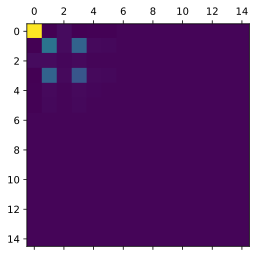

In [6]:
plt.matshow(rho.real)

and one can check that it corresponds to a pure state by calculating its purity

In [7]:
np.trace(rho_norm@rho_norm)

(1.0000000000000215-8.415093434245613e-15j)